<a href="https://colab.research.google.com/github/robd123/AML/blob/main/Project7/Project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
%pip install visualkeras

In [71]:
import urllib.request
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import cv2
import random
import visualkeras

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.utils import np_utils, to_categorical
from keras.optimizers import SGD, Adam
from matplotlib import figure, pyplot
from sklearn.compose import ColumnTransformer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [72]:
datapath = os.path.join("datasets", "zipped", "")
os.makedirs(datapath, exist_ok=True)

# Dataset is already split into test and train data
file_path = "https://raw.githubusercontent.com/robd123/AML/master/Project7/facesDB.zip"

urllib.request.urlretrieve(file_path, datapath + "facesDB.zip")

('datasets/zipped/facesDB.zip', <http.client.HTTPMessage at 0x7fa61e3897d0>)

In [73]:
!unzip datasets/zipped/facesDB.zip

Archive:  datasets/zipped/facesDB.zip
replace facesDB/S1/1.BMP? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


**Import Images and Split Train and Test Data**

---
Because of the relatively high number of target classes compared to images, 40 classes and 400 images, a direct train/test split is not feasible as it may leave certain target classes out of the test set entirely.  For this dataset, 2 images will be selected randomly from each target class and added to the test set with the rest added to the training set.


In [74]:
train_images = list()
train_labels = list()
test_images = list()
test_labels = list()
for i in range(1, 41):
  rands = random.sample(range(1, 11), 2) # Get 2 random numbers, these will be the indices of the images to be used in the test set
  for j in range(1, 11):
    img = cv2.imread("facesDB/S{0}/{1}.BMP".format(str(i), str(j)))
    if j in rands:
      test_images.append(img)
      test_labels.append(i - 1)
    else:
      train_images.append(img)
      train_labels.append(i - 1)
train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels)
test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)

In [75]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(320, 48, 48, 3)
(320,)
(80, 48, 48, 3)
(80,)


**Display Some of the Training Images**

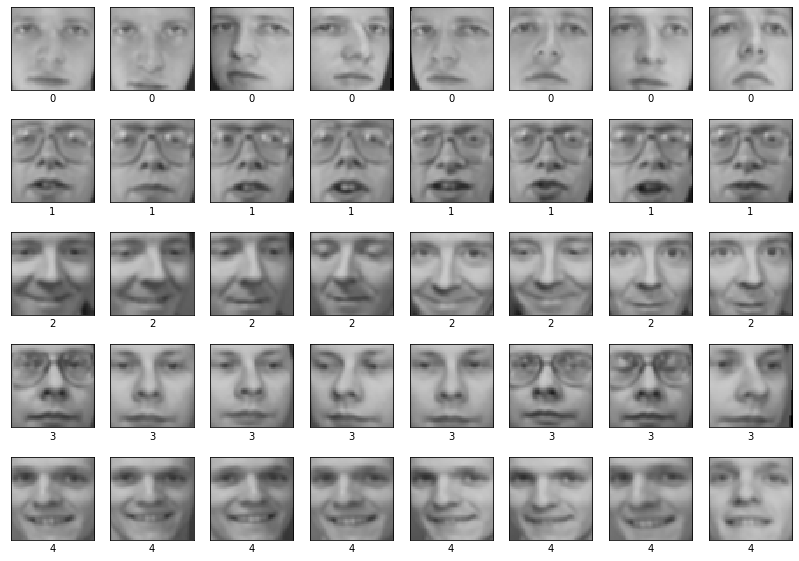

In [76]:
plt.figure( figsize=(14, 10), num='Some Images' )
plt.title( 'First 5 Targets' )
for i in range( 40 ):
    plt.subplot( 5, 8, i+1 )
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.gray, interpolation='nearest')
    plt.xlabel(train_labels[i])
plt.show()

**Normalize Data**

In [77]:
x_train = train_images.astype( 'float32' )/255
x_test = test_images.astype( 'float32' )/255
print(x_train[0].shape)

(48, 48, 3)


In [78]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
print(y_train.shape)
print(y_test.shape)

(320, 40)
(80, 40)


# Initial Predictive Model

**Model Definition**

In [79]:
 def create_model_1():
  model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(40, activation="softmax")
    ])
  opt = SGD(momentum=0.5)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [80]:
model = create_model_1()

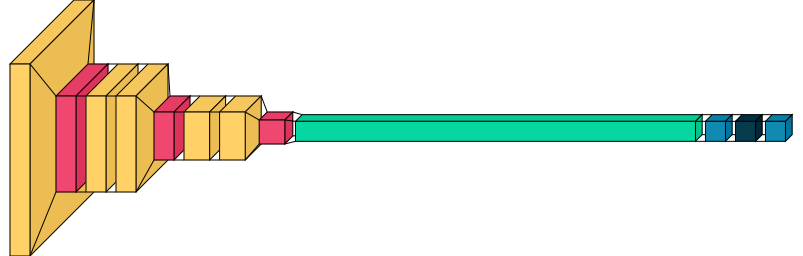

In [81]:
visualkeras.layered_view(model)

**Train Model, Use Test Set for Validation**

In [82]:
history = model.fit(x_train, y_train, epochs=50, batch_size=8, validation_data=(x_test, y_test))

Epoch 1/50
40/40 [==============================] - 1s 11ms/step - loss: 3.6946 - accuracy: 0.0188 - val_loss: 3.6875 - val_accuracy: 0.0250
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 3.6898 - accuracy: 0.0479 - val_loss: 3.6865 - val_accuracy: 0.0500
Epoch 3/50
40/40 [==============================] - 0s 6ms/step - loss: 3.6910 - accuracy: 0.0201 - val_loss: 3.6855 - val_accuracy: 0.0375
Epoch 4/50
40/40 [==============================] - 0s 7ms/step - loss: 3.6886 - accuracy: 0.0274 - val_loss: 3.6846 - val_accuracy: 0.0375
Epoch 5/50
40/40 [==============================] - 0s 7ms/step - loss: 3.6838 - accuracy: 0.0297 - val_loss: 3.6838 - val_accuracy: 0.0250
Epoch 6/50
40/40 [==============================] - 0s 7ms/step - loss: 3.6875 - accuracy: 0.0185 - val_loss: 3.6818 - val_accuracy: 0.0375
Epoch 7/50
40/40 [==============================] - 0s 6ms/step - loss: 3.6839 - accuracy: 0.0294 - val_loss: 3.6811 - val_accuracy: 0.0500
Epoch 8/50
40/40 [=

**Loss and Accuracy Plot**

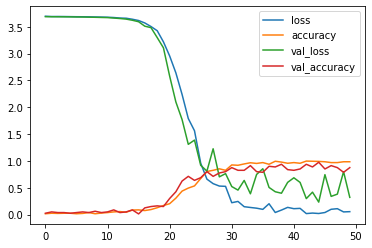

In [83]:
pd.DataFrame(model.history.history).plot()

# Test Models Using kFold Cross-Validation from Example

---
Here, I borrowed the model evaluation code provided in the MNIST example (https://colab.research.google.com/github/bforoura/AML/blob/master/MNIST_CNN.ipynb) to see how well it would work for the next part of this assignment. The problem for comparison of models using this method is that models models seem to either 'pass' or 'fail' it.  The cross validation accuracy after 4 folds and 30 epochs is always 100% or under 5%.  Reducing the number of folds or epochs doesn't change this significantly.  The model either works perfectly or fails entirely.  For this reason, for experimentally determining accuracy, I decided to just fit models on the full training set and evaluate their accuracy percent on the full training set.


In [91]:
# Evaluate the model using k-fold cross-validation

def evaluate_model(model, dataX, dataY, n_folds):

	scores, histories = list(), list()
 
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
 
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
  
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]

		# fit model
		history = model.fit(trainX, trainY, epochs=30, batch_size=8, validation_data=(testX, testY), verbose=0)
  
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('CV Fold accuracy:  %.3f' % (acc * 100.0))
  
		# stores scores
		scores.append(acc)
		histories.append(history)
  
	return scores, histories


In [92]:
# Plot learning curves

def summarize_learning(histories):

  for i in range(len(histories)):
		
    # plot loss
    pyplot.subplot(2, 1, 1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		
    # plot accuracy
    pyplot.subplot(2, 1, 2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='red', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='green', label='test')
  
    pyplot.show()

In [99]:
# Summarize model performance

def summarize_performance(scores):

	# print summary
	print('Model Accuracy: mean=%.3f std=%.3f, folds=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
 


In [96]:
# The main driver for evaluating the model

def process(model, num_folds):
	# evaluate the model using CV
	scores, histories = evaluate_model(model, x_train, y_train, num_folds)
 
	# learning curves
	summarize_learning(histories)
 
	# summarize estimated performance
	summarize_performance(scores)

CV Fold accuracy:  71.250
CV Fold accuracy:  93.750
CV Fold accuracy:  100.000
CV Fold accuracy:  100.000


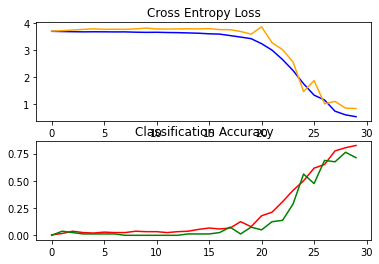

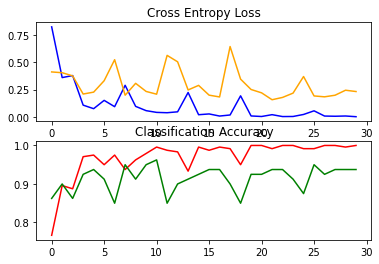

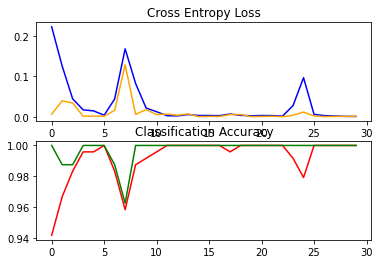

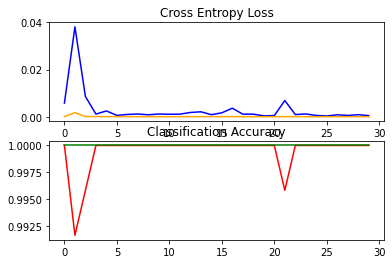

Model Accuracy: mean=91.250 std=11.826, folds=4


In [100]:
model = create_model_1()
process(model, 4)

# Define Base Models

In [84]:
 def create_model(optimizer, dropout):
  model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(40, activation="softmax")
    ])
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

**Base Model With Increased Filter Number**

In [87]:
 def create_model_increased_filter(optimizer, dropout):
  model = Sequential([
    keras.layers.Conv2D(64, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(40, activation="softmax")
    ])
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

**Base Model with 4 Convolution Layers**

In [85]:
 def create_model_4_conv_layers(optimizer, dropout):
  model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(40, activation="softmax")
    ])
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

**Base Model With 4 Dense Layers**

In [86]:
 def create_model_4_dense_layers(optimizer, dropout):
  model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(40, activation="softmax")
    ])
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# Experiment With Hyperparameters

In [88]:
accuracy_scores = list()
names = list()

In [89]:
model_1 = create_model(SGD(momentum=0.5), dropout = 0.1)
model_1.fit(x_train, y_train, epochs=100, batch_size=16, verbose=0)
y_pred = np.argmax(model_1.predict(x_test), axis = 1)
accuracy = accuracy_score(test_labels, y_pred)
accuracy_scores.append(accuracy)
names.append('Baseline')
print("Test Set Accuracy: {}".format(str(accuracy)))

Test Set Accuracy: 0.925


**Reduce Batch Size to 8. This generally improves accuracy, so batch size remains at 8 for all**

In [90]:
# Reduced Batch Size to 8
model_2 = create_model(SGD(momentum=0.5), dropout = 0.1)
model_2.fit(x_train, y_train, epochs=100, batch_size=8, verbose=0)
y_pred = np.argmax(model_2.predict(x_test), axis = 1)
accuracy = accuracy_score(test_labels, y_pred)
accuracy_scores.append(accuracy)
names.append('Reduced Batch Size')
print("Test Set Accuracy: {}".format(str(accuracy)))

Test Set Accuracy: 0.925


In [ ]:
# Increased Number of Convolution Layers
model_3 = create_model_4_conv_layers(SGD(momentum=0.5), dropout = 0.1)
model_3.fit(x_train, y_train, epochs=100, batch_size=8, verbose=0)
y_pred = np.argmax(model_3.predict(x_test), axis = 1)
accuracy = accuracy_score(test_labels, y_pred)
accuracy_scores.append(accuracy)
names.append('Increased Convolution Layers')
print("Test Set Accuracy: {}".format(str(accuracy)))

Test Set Accuracy: 0.9125


In [ ]:
model_4 = create_model_4_dense_layers(SGD(momentum=0.5), dropout = 0.1)
model_4.fit(x_train, y_train, epochs=100, batch_size=8, verbose=0)
y_pred = np.argmax(model_4.predict(x_test), axis = 1)
accuracy = accuracy_score(test_labels, y_pred)
accuracy_scores.append(accuracy)
names.append('Increased Dense Layers')
print("Test Set Accuracy: {}".format(str(accuracy)))

Test Set Accuracy: 0.975


In [ ]:
# Change SGD Momentum
model_5 = create_model(SGD(momentum=0.8), dropout = 0.1)
model_5.fit(x_train, y_train, epochs=100, batch_size=8, verbose=0)
y_pred = np.argmax(model_5.predict(x_test), axis = 1)
accuracy = accuracy_score(test_labels, y_pred)
accuracy_scores.append(accuracy)
names.append('Increased Optimizer Momentum')
print("Test Set Accuracy: {}".format(str(accuracy)))

Test Set Accuracy: 0.95


In [ ]:
# Increase Batch Size
model_6 = create_model(SGD(momentum=0.5), dropout = 0.1)
model_6.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred = np.argmax(model_6.predict(x_test), axis = 1)
accuracy = accuracy_score(test_labels, y_pred)
accuracy_scores.append(accuracy)
names.append('Increased Batch Size')
print("Test Set Accuracy: {}".format(str(accuracy)))

Test Set Accuracy: 0.925


In [ ]:
# Adam Optimizer
model_7 = create_model('adam', dropout = 0.1)
model_7.fit(x_train, y_train, epochs=100, batch_size=8, verbose=0)
y_pred = np.argmax(model_7.predict(x_test), axis = 1)
accuracy = accuracy_score(test_labels, y_pred)
accuracy_scores.append(accuracy)
names.append('Adam Optimizer')
print("Test Set Accuracy: {}".format(str(accuracy)))

Test Set Accuracy: 0.025


In [ ]:
model_8 = create_model_4_dense_layers(SGD(momentum=0.5), dropout = 0.25)
model_8.fit(x_train, y_train, epochs=100, batch_size=8, verbose=0)
y_pred = np.argmax(model_8.predict(x_test), axis = 1)
accuracy = accuracy_score(test_labels, y_pred)
accuracy_scores.append(accuracy)
names.append('Increased Dropout')
print("Test Set Accuracy: {}".format(str(accuracy)))

Test Set Accuracy: 0.95


In [ ]:
model_9 = create_model_4_dense_layers(SGD(momentum=0.3), dropout = 0.1)
model_9.fit(x_train, y_train, epochs=150, batch_size=4, verbose=0) #Increased epochs to compensate for decreased momentum and batch size
y_pred = np.argmax(model_9.predict(x_test), axis = 1)
accuracy = accuracy_score(test_labels, y_pred)
accuracy_scores.append(accuracy)
names.append('Decreased Momentum and Batch Size')
print("Test Set Accuracy: {}".format(str(accuracy)))

Test Set Accuracy: 0.9625


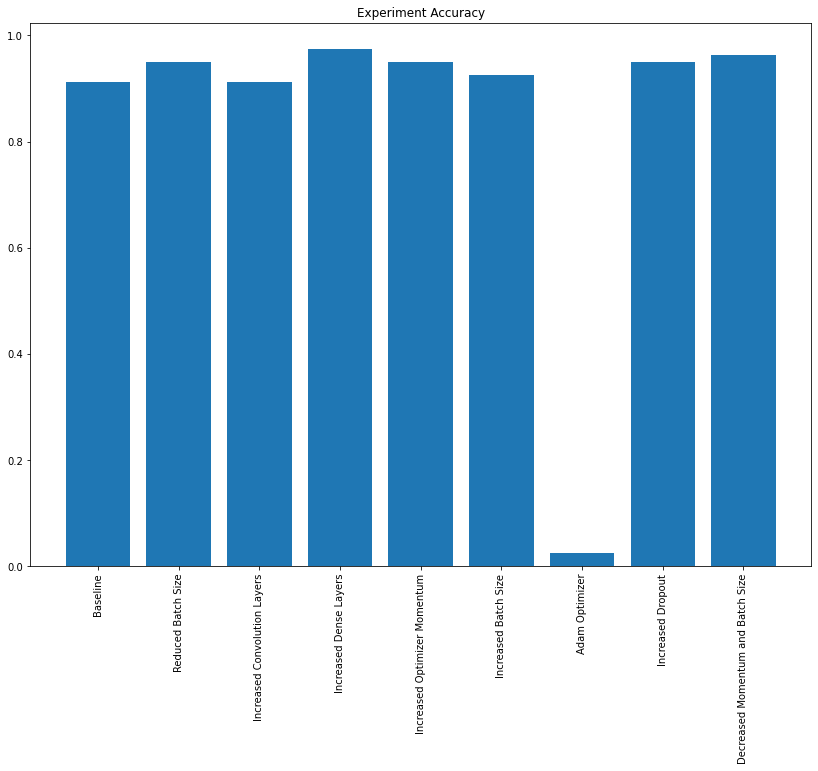

In [ ]:
plt.figure( figsize=(14,10) )
plt.title( 'Experiment Accuracy' )
plt.bar(names, accuracy_scores)
plt.xticks(rotation=90)
plt.show()

[Text(159.0, 0.5, 'Actual'), Text(0.5, 69.0, 'Predicted')]

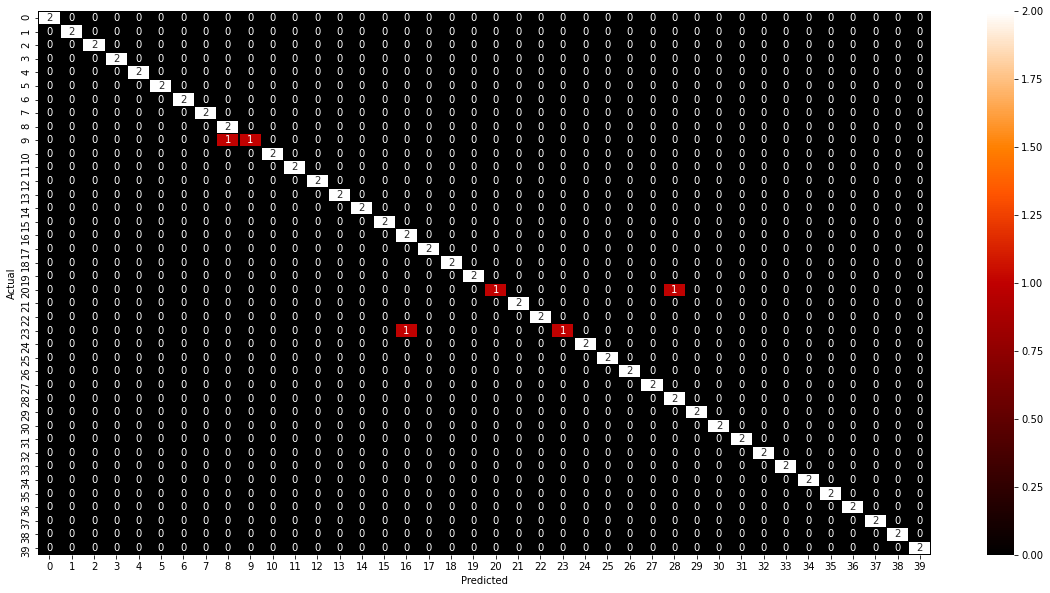

In [ ]:
pred_labels = np.argmax(model_9.predict(x_test), axis = 1)
cm = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(cm, cmap='gist_heat', annot=True, xticklabels=np.arange(0,40), vmax=2, vmin=0, linewidths=.3, linecolor='black')
heatmap.set(xlabel="Predicted", ylabel = "Actual")